<a href="https://colab.research.google.com/github/markmilner21/Variable-Selection-With-Knock-Offs/blob/main/Research/Experiment_7_knockoff_stat/R_experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("knockoff")
library(knockoff)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘Rdsdp’, ‘corpcor’, ‘glmnet’, ‘RSpectra’, ‘gtools’




First Let us define a function to compute the false discovery proportion

In [13]:
fdp = function(selected,beta){
  fdp = sum(beta[selected] == 0) / max(1, length(selected))
  return(fdp)
}

Second Let us define a function to compute the power

In [14]:
power = function(selected,beta) {
  TP = sum(beta[selected] != 0)
  T = sum(beta != 0)
  return(TP / T)}

For replicability, let us set a seed

In [4]:
set.seed(21)

Now, let us define a dfunction that generates all of the necessary data we need (the covariates and the target). In this case, we are generating Gaussian random variables

In [16]:
y.sample <- function(n,X,beta){
  # X %*% beta + rnorm(n)
  rbinom(n, prob=invlogit(X %*% beta), size=1)
}

invlogit = function(x) {
  exp(x) / (1+exp(x))
}

generate_synthetic_data = function(n,p,relevant_count,amplitude,rho){
  mu <- rep(0, p)
  Sigma <- toeplitz(rho^(0:(p-1)))
  X = matrix(rnorm(n * p), n) %*% chol(Sigma)
  nonzero <- sample(p, relevant_count)
  beta <- amplitude * (1:p %in% nonzero) / sqrt(n)
  y <- factor(y.sample(n,X,beta), levels=c(0,1), labels=c('A','B'))
  list(X=X,y=y,beta=beta)
}

output = generate_synthetic_data(1000,1000,60,4.5,0.25)
X = output$X
y = output$y
beta = output$beta
result = knockoff.filter(X, y)
result$selected

Warning message:
“doParallel is not installed. Without parallelization, the statistics will be slower to compute”


ERROR: Error in cv_coeffs_glmnet(cbind(X.swap, Xk.swap), y, family = family, : Input y must be numeric.


In [6]:
fdp(result$selected,beta)
power(result$selected,beta)

[1] 0.1639344

[1] 0.85

# Testing - INSERT: https://cran.r-project.org/web/packages/knockoff/knockoff.pdf - This needs to be referenced

This is experiment 7: modifying the knockoff statistic W_j. We will consider various choices of knockoff statstic

In [7]:
n = 1000
p = 1000
relevant_count = 50
amplitude = 4.5
rho = 0.25
fdp_s = c()
power_s = c()

In [10]:
current_data = generate_synthetic_data(n, p, relevant_count, amplitude, rho)
X = current_data$X
nonzero <- sample(p, relevant_count)
beta <- amplitude * (1:p %in% nonzero) / sqrt(n)
y <- y.sample(n,X,beta)
# stat.glmnet_coefdiff (default)
result = knockoff.filter(X=X, y=y)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
# stat.glmnet_lambdadiff
# result = knockoff.filter(X=X, y=y, statistic=stat.glmnet_lambdadiff)
# current_fdp = fdp(result$selected,beta)
# current_power = power(result$selected,beta)
# fdp_s = c(fdp_s, current_fdp)
# power_s = c(power_s, current_power)
# stat.glmnet_lambdasmax
result = knockoff.filter(X=X, y=y, statistic=stat.glmnet_lambdasmax)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
#  stat.lasso_coefdiff
result = knockoff.filter(X=X, y=y, statistic=stat.lasso_coefdiff)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
# stat.lasso_coefdiff_bin
# result = knockoff.filter(X=X, y=y, statistic=stat.lasso_coefdiff_bin)
# current_fdp = fdp(result$selected,beta)
# current_power = power(result$selected,beta)
# fdp_s = c(fdp_s, current_fdp)
# power_s = c(power_s, current_power)
#  stat.lasso_lambdadiff
result = knockoff.filter(X=X, y=y, statistic=stat.lasso_lambdadiff )
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
# stat.lasso_lambdadiff_bin
# result = knockoff.filter(X=X, y=y, statistic=stat.lasso_lambdadiff_bin)
# current_fdp = fdp(result$selected,beta)
# current_power = power(result$selected,beta)
# fdp_s = c(fdp_s, current_fdp)
# power_s = c(power_s, current_power)
# stat.lasso_lambdasmax
result = knockoff.filter(X=X, y=y, statistic=stat.lasso_lambdasmax)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
# stat.lasso_lambdasmax_bin
# result = knockoff.filter(X=X, y=y, statistic=stat.lasso_lambdasmax_bin)
# current_fdp = fdp(result$selected,beta)
# current_power = power(result$selected,beta)
# fdp_s = c(fdp_s, current_fdp)
# power_s = c(power_s, current_power)
# stat.random_forest
result = knockoff.filter(X=X, y=y, statistic=stat.random_forest)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
#  stat.sqrt_lasso
result = knockoff.filter(X=X, y=y, statistic=stat.sqrt_lasso)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)
#  stat.stability_selection
result = knockoff.filter(X=X, y=y, statistic=stat.stability_selection)
current_fdp = fdp(result$selected,beta)
current_power = power(result$selected,beta)
fdp_s = c(fdp_s, current_fdp)
power_s = c(power_s, current_power)

# Print results to check
print(fdp_s)
print(power_s)



Warning message:
“doParallel is not installed. Without parallelization, the statistics will be slower to compute”
Warning message:
“doParallel is not installed. Without parallelization, the statistics will be slower to compute”


ERROR: Error: ranger is not installed


## Visualising our results

Let us now produce some plots

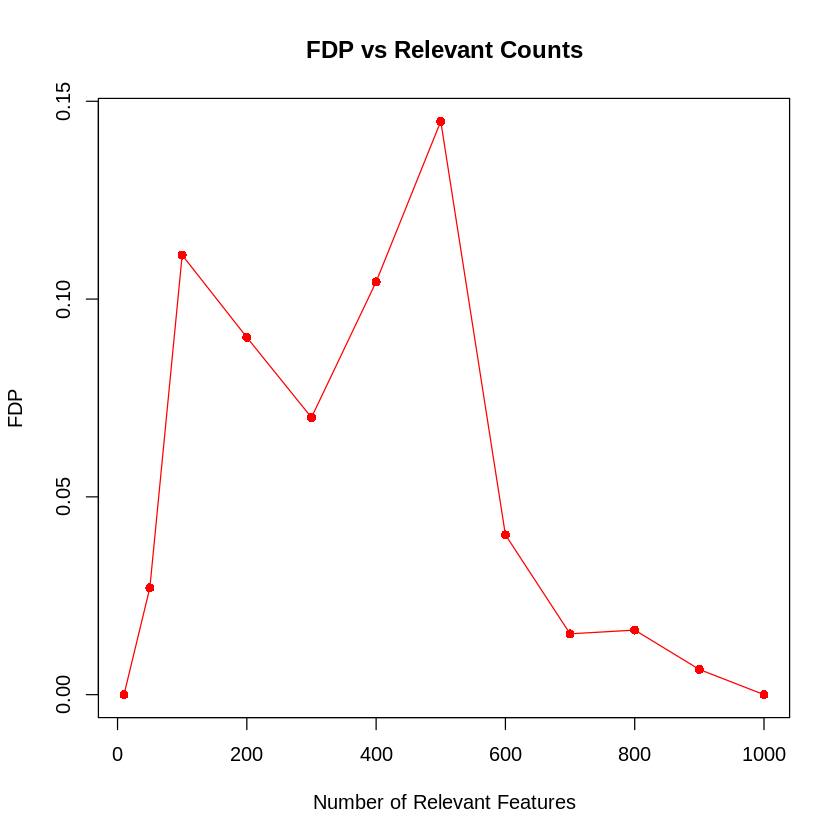

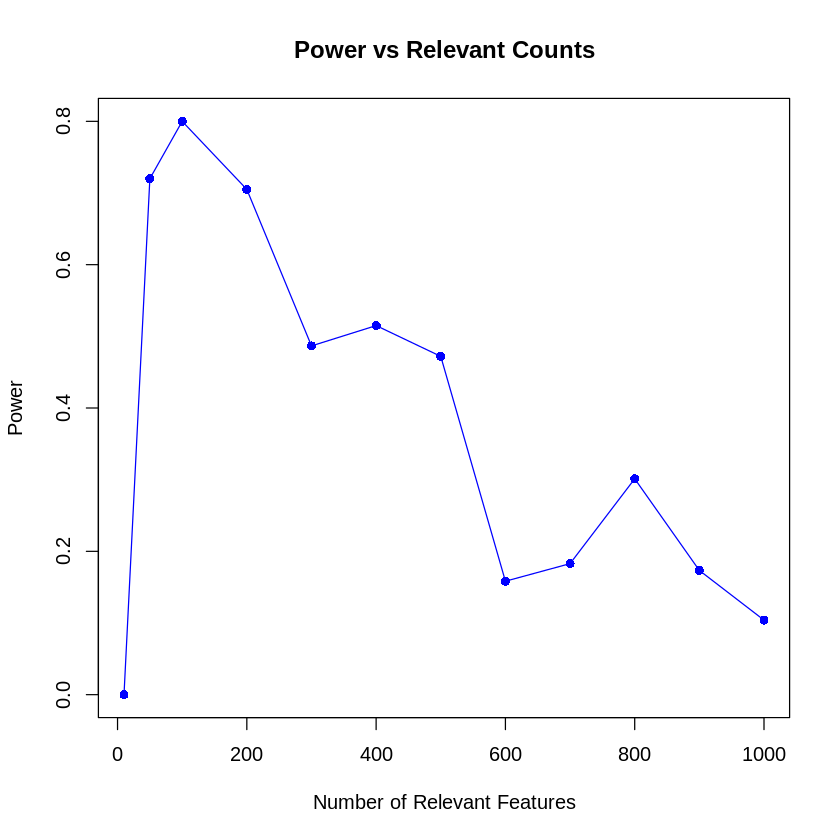

In [ ]:
plot(relevant_counts, fdp_s, type = "o", col = "red", pch = 16, lty = 1,
     xlab = "Number of Relevant Features", ylab = "FDP",
     main = "FDP vs Relevant Counts")

plot(relevant_counts, power_s, type = "o", col = "blue", pch = 16, lty = 1,
     xlab = "Number of Relevant Features", ylab = "Power",
     main = "Power vs Relevant Counts")
